<a href="https://colab.research.google.com/github/Tushar6396/Calendar/blob/main/Copy_of_medical_cost_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
medical_df = pd.read_csv('insurance.csv')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 300x300 with 0 Axes>

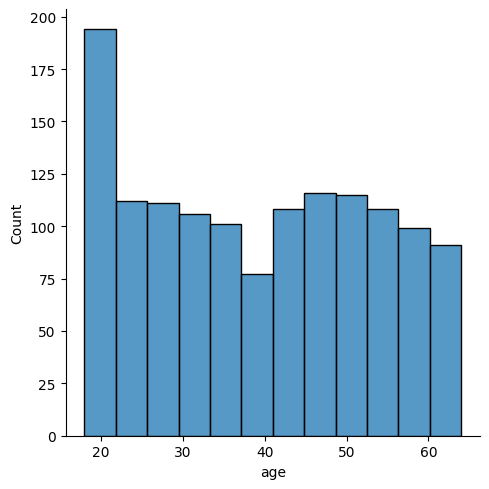

In [ ]:
#Data Visualization
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')

<ipython-input-14-cd0fcb971312>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=medical_df,x='sex',kind='hist', palette="Set2")


<Figure size 300x300 with 0 Axes>

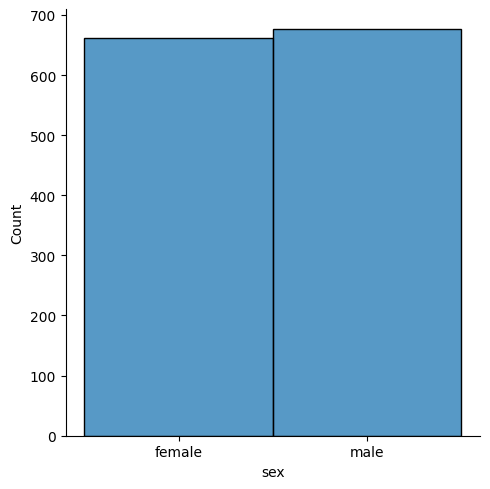

In [ ]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist', palette="Set2")

In [ ]:
medical_df['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-13-6d90a30633f7>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=medical_df,x='bmi', palette="Set1")


<Figure size 400x400 with 0 Axes>

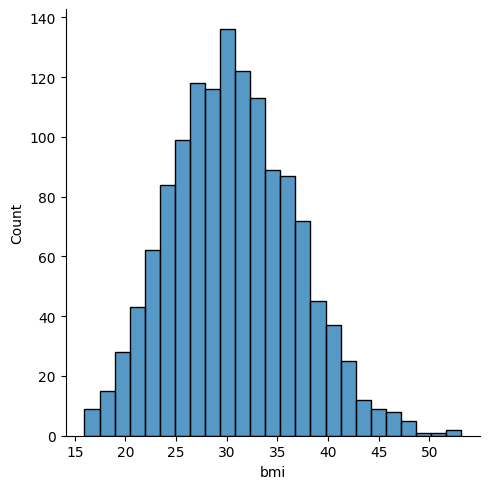

In [ ]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi', palette="Set1")
plt.show()

In [ ]:
medical_df['bmi'].value_counts()

,count
bmi,
32.300,13
28.310,9
30.800,8
31.350,8
30.495,8
...,...
39.425,1
40.480,1
38.900,1


<ipython-input-17-525628ed03a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=medical_df, x='children', palette='Set2')


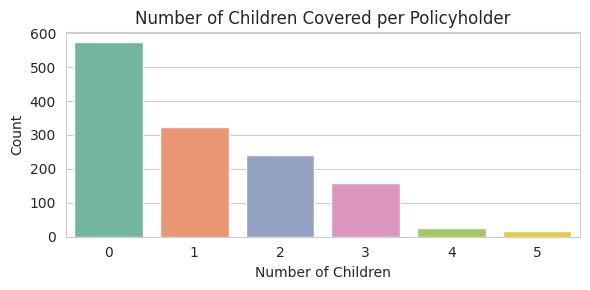

In [ ]:
plt.figure(figsize=(6, 3))
sns.set_style("whitegrid")

sns.countplot(data=medical_df, x='children', palette='Set2')

plt.title('Number of Children Covered per Policyholder')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
medical_df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<ipython-input-20-601639297480>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=medical_df,x='smoker', palette="Set1")


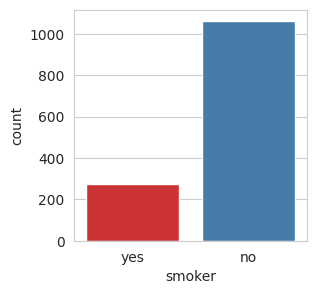

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=medical_df,x='smoker', palette="Set1")
plt.show()

In [ ]:
medical_df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

<ipython-input-22-6a979b7141de>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-22-6a979b7141de>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-22-6a979b7141de>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [ ]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [ ]:
X_train.shape

(1204, 6)

In [ ]:
X_test.shape

(134, 6)

In [ ]:
#Linear Regression
lg = LinearRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
r2_lg = r2_score(y_test,y_pred)
print("Linear Regression R2 score:", r2_lg)

Linear Regression R2 score: 0.7058997983752826


In [ ]:
#K-Nearest Neighbors (KNN) Regression:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Calculate R2 score
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN R2 score:", r2_knn)

KNN R2 score: 0.7390091493281228


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R2 score:", r2_rf)

Random Forest R2 score: 0.7464287274273775


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Train the model
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Calculate R2 score
r2_gbm = r2_score(y_test, y_pred_gbm)
print("Gradient Boosting R2 score:", r2_gbm)

Gradient Boosting R2 score: 0.801191567504624


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Train the model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Calculate R2 score
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost R2 score:", r2_xgb)

XGBoost R2 score: 0.7036789315163705
